# Wealth Across Denmark, Germany and the United Kingdom

Imports and set magics:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# Load in the wealth data from Denmark and change index structure so it starts from 1
nwdk = pd.read_excel('DK.xlsx')
nwdk.index= nwdk.index + 1
# Print the head to inspect data to ensure index is changed and Danish data looks alright
print(nwdk.head(5))



   Year  DK1. decil  DK2. decil  DK3. decil  DK4. decil  DK5. decil   \
1  1995    144.2600    745.9645   2237.8936   5967.7163   14266.5719   
2  1996    140.9271    706.4804   2321.2929   6358.3239   15239.7923   
3  1997      6.9601    217.9862   1198.9239   4686.7025   13406.1489   
4  1998    477.6739   1528.1518   2468.5530   3408.9541   12695.4152   
5  1999    206.2599   1020.5656   2934.1261   7654.2420   18242.6101   

   DK6. decil  DK7. decil   DK8. decil   DK9. decil  DK10. decil           DK1  
1  31237.2652  62008.3026  113200.1194  184439.7332  435493.8701  1.600136e+06  
2  33608.2836  67115.6415  122624.8186  199833.0378  471589.2895  1.723438e+06  
3  32043.9657  66921.7514  126431.9734  210901.6108  537106.4356  2.135559e+06  
4  34207.0910  72175.7865  136475.7136  227341.9726  580266.1041  2.342703e+06  
5  39164.2050  77690.5564  142624.0428  235495.5125  636454.7998  2.725691e+06  


In [63]:
#Perform same task as above with the data from Germany and UK
nwdeuk = pd.read_excel('DEUK.xlsx')
nwdeuk.index= nwdeuk.index + 1
# Print the head to inspect data to ensure index is changed and Danish data looks alright
print(nwdeuk.head(5))

   Year  DE1. decil  DE2. decil  DE3. decil  DE4. decil  DE5. decil   \
1  1995  -7792.9574   1024.7396   5775.8046  13694.2465   38171.1875   
2  1996  -8133.2176   1070.3703   6032.9962  14206.7329   36255.2849   
3  1997  -8567.2710   1124.4604   6337.8676  14924.6559   35010.6384   
4  1998  -8992.8321   1178.5482   6642.7260  15749.6889   38682.0671   
5  1999 -10538.4397    999.3080   6439.9848  16099.9621   45340.6336   

   DE6. decil   DE7. decil   DE8. decil   DE9. decil  ...  UK2. decil  \
1  56483.8445   81336.7360  120697.0571  192639.6379  ...   1308.0469   
2  55492.7831   81636.0498  124797.1034  203103.5863  ...    739.9037   
3  54563.7498   82175.9137  128020.0328  212706.1433  ...    792.6937   
4  60090.0814   90651.8672  141588.1770  236078.7227  ...    738.2074   
5  69392.2958  104819.7443  161698.6753  262780.6612  ...   1950.1347   

   UK3. decil  UK4. decil  UK5. decil   UK6. decil  UK7. decil   UK8. decil  \
1  10226.5487  24020.4981   31613.3568  49915.826

# Read and clean data

We now merge our two datasets to work on the data merged

In [64]:
nwdeuk_dropped = nwdeuk.drop(columns='Year')

#merge dataframes
netwealth = pd.concat([nwdk, nwdeuk_dropped], axis=1, join='inner')
display(netwealth)

,Year,DK1. decil,DK2. decil,DK3. decil,DK4. decil,DK5. decil,DK6. decil,DK7. decil,DK8. decil,DK9. decil,...,UK2. decil,UK3. decil,UK4. decil,UK5. decil,UK6. decil,UK7. decil,UK8. decil,UK9. decil,UK10. decil,UK1
1,1995,144.2600,745.9645,2237.8936,5967.7163,14266.5719,31237.2652,62008.3026,113200.1194,184439.7332,...,1308.0469,10226.5487,24020.4981,31613.3568,49915.8265,73542.6511,108816.5018,172265.0635,5.964700e+05,1.975895e+06
2,1996,140.9271,706.4804,2321.2929,6358.3239,15239.7923,33608.2836,67115.6415,122624.8186,199833.0378,...,739.9037,7522.3551,20840.6230,30859.3944,48792.7784,71849.9863,106202.8971,169551.9936,6.368561e+05,2.096353e+06
3,1997,6.9601,217.9862,1198.9239,4686.7025,13406.1489,32043.9657,66921.7514,126431.9734,210901.6108,...,792.6937,6341.5496,19024.6488,31654.4037,49498.1988,73086.2294,107429.4241,172815.9336,7.158689e+05,2.464734e+06
4,1998,477.6739,1528.1518,2468.5530,3408.9541,12695.4152,34207.0910,72175.7865,136475.7136,227341.9726,...,738.2074,7677.3568,21998.5801,32105.6499,50307.2782,73691.3146,107440.1671,171904.2673,8.026184e+05,2.815869e+06
5,1999,206.2599,1020.5656,2934.1261,7654.2420,18242.6101,39164.2050,77690.5564,142624.0428,235495.5125,...,1950.1347,10725.7412,26164.3082,34720.3557,54619.3736,79184.3684,114453.6624,181973.0892,8.543407e+05,2.988658e+06
6,2000,622.2072,2436.9850,5686.2983,12049.5370,23963.6859,46438.1031,85971.4154,150957.6822,246000.0973,...,1538.5114,10598.6343,27180.3687,37603.2761,58755.1188,84607.3711,122210.6472,194185.6678,9.138207e+05,3.130374e+06
7,2001,429.1632,1885.8601,4579.9461,10641.6394,22899.7303,47011.7993,89982.4698,160702.2252,260518.1085,...,1940.4556,11289.9231,29283.2380,39791.5691,62014.7851,88742.7070,127333.0213,201510.5123,9.314450e+05,3.242659e+06
8,2002,25.2331,397.4503,2119.7351,7154.1058,18812.6486,43587.0520,89558.8060,165869.2680,269338.8353,...,904.9251,10859.1009,30948.4378,42742.7739,66488.7594,94830.7422,134969.1176,210037.0719,9.609839e+05,3.254001e+06
9,2003,481.7007,2034.0309,5017.2762,11390.5729,24272.7685,49087.9452,93294.2162,165841.3175,267136.0552,...,957.8431,12451.9608,34482.3530,46652.9563,73078.7567,103745.7349,146810.0022,226739.8923,9.986939e+05,3.231966e+06
10,2004,888.8689,3544.9490,7680.7229,15361.4458,29984.3605,56128.3595,101326.4596,174736.4456,279755.5604,...,1410.3742,14708.1874,38684.5478,53167.2706,82804.4316,116752.4524,164351.5291,252005.6779,1.042366e+06,3.513859e+06


We are very happy with the result - Very good dataframe. Let's now take a look at the wealth level for each country by plotting the average wealth across each year for each country

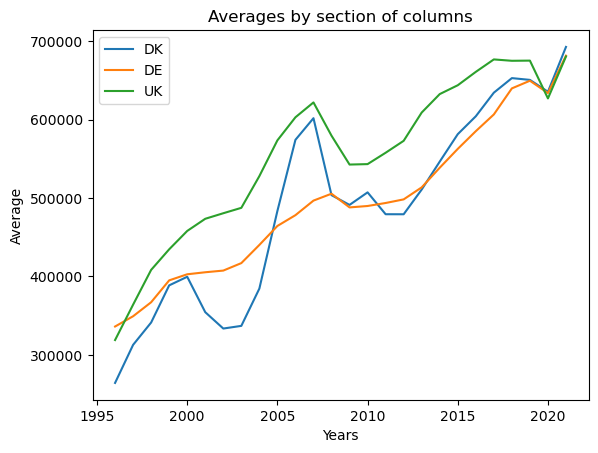

In [65]:
# Select the rows and columns you want to calculate the average for
netwealth_subset = netwealth.iloc[1:, [i for i in range(2, 12)] + [i for i in range(13, 23)] + [i for i in range(24, 34)]]

# Calculate the averages for each section of columns
avg_dk = netwealth_subset.iloc[:, 0:10].mean(axis=1)
avg_de = netwealth_subset.iloc[:, 10:20].mean(axis=1)
avg_uk = netwealth_subset.iloc[:, 20:30].mean(axis=1)

# Add the averages to the dataframe
netwealth.iloc[1:, 1] = avg_dk
netwealth.iloc[1:, 12] = avg_de
netwealth.iloc[1:, 23] = avg_uk

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the averages for each section of columns
ax.plot(netwealth['Year'][1:], avg_dk, label='DK')
ax.plot(netwealth['Year'][1:], avg_de, label='DE')
ax.plot(netwealth['Year'][1:], avg_uk, label='UK')

# Add axis labels and a legend
ax.set_xlabel('Years')
ax.set_ylabel('Average')
ax.set_title('Averages by section of columns')
ax.legend()

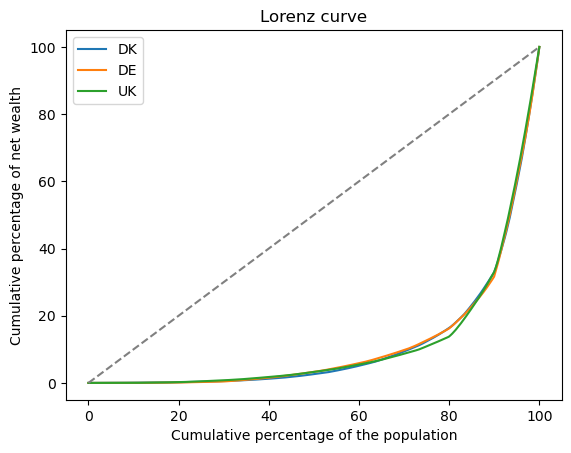

In [66]:
# Define a function to calculate the Lorenz curve
def lorenz_curve(data):
    # Get the sorted data
    sorted_data = np.sort(data)
    # Calculate the cumulative sums of the data
    cumsum_data = np.cumsum(sorted_data)
    # Calculate the cumulative percentage of the data
    cumperc_data = 100 * cumsum_data / cumsum_data[-1]
    # Calculate the equally distributed population percentages
    pop_perc = np.linspace(0, 100, len(data))
    # Return the cumulative percentage of the data and the equally distributed population percentages
    return pop_perc, cumperc_data

# Calculate the Lorenz curve for the netwealth dataframe
pop_perc, cumperc_dk = lorenz_curve(netwealth.iloc[1:, 2:12].values.flatten())
_, cumperc_de = lorenz_curve(netwealth.iloc[1:, 13:23].values.flatten())
_, cumperc_uk = lorenz_curve(netwealth.iloc[1:, 24:34].values.flatten())

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the Lorenz curve for each section of columns
ax.plot(pop_perc, cumperc_dk, label='DK')
ax.plot(pop_perc, cumperc_de, label='DE')
ax.plot(pop_perc, cumperc_uk, label='UK')
ax.plot([0, 100], [0, 100], linestyle='--', color='gray')

# Add axis labels and a legend
ax.set_xlabel('Cumulative percentage of the population')
ax.set_ylabel('Cumulative percentage of net wealth')
ax.set_title('Lorenz curve')
ax.legend()

In [67]:
# Calculate the Gini coefficient for each section of columns of the netwealth dataframe
gini_dk = gini_coefficient(netwealth.iloc[1:, 2:12].values.flatten())
gini_de = gini_coefficient(netwealth.iloc[1:, 13:23].values.flatten())
gini_uk = gini_coefficient(netwealth.iloc[1:, 24:34].values.flatten())

# Print the Gini coefficients
print('Gini coefficient for DK:', gini_dk)
print('Gini coefficient for DE:', gini_de)
print('Gini coefficient for UK:', gini_uk)

NameError: name 'gini_coefficient' is not defined

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.